# Assignment 21.5: Gold and Silver Report

In [53]:
# Author:  Conkle, Taylor
# Date:    Nov. 04, 2018
# Class:   IS 3073.001

In [54]:
import quandl
import pandas as pd

api_key = '8jk9e-_d-8Mh95e5Qyx_'

df = quandl.get('NASDAQOMX/NQCIGCER', authtoken=api_key) # get gold prices

In [55]:
df.reset_index(inplace=True)

In [56]:
df=df[['Trade Date','Index Value']]

In [57]:
df.to_pickle('RawGold.pickle')

In [58]:
df = quandl.get('NASDAQOMX/NQCISIER', authtoken=api_key) # get silver prices

In [59]:
df.reset_index(inplace=True)

In [60]:
df=df[['Trade Date','Index Value']]

In [61]:
df.to_pickle('RawSilver.pickle')

In [62]:
df1 = pd.read_pickle('RawGold.pickle')
df2 = pd.read_pickle('RawSilver.pickle')

In [63]:
# As of right now, the data frames include closing prices of each day...

In [64]:
df = pd.merge(df1,df2, on='Trade Date')

In [65]:
df.rename(columns={'Index Value_x':'Gold','Index Value_y':'Silver'}, inplace=True)

In [66]:
df.set_index('Trade Date', inplace=True)

In [67]:
df.to_pickle('GoldSilver.pickle')

In [68]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')  # fivethirtyeight is a graphing style

In [69]:
df = df[['Gold','Silver']].resample('Y').mean() # how = 'mean'
print(df)

                   Gold       Silver
Trade Date                          
2012-12-31  1032.434056  1027.614111
2013-12-31   869.383426   791.352908
2014-12-31   778.613333   627.354405
2015-12-31   709.668214   508.622222
2016-12-31   761.005317   548.748889
2017-12-31   754.360199   533.299801
2018-12-31   749.432207   485.938122


In [70]:
df=pd.read_pickle('GoldSilver.pickle')

In [71]:
df = df[['Gold','Silver']].resample('Y').mean()

In [72]:
print(df)

                   Gold       Silver
Trade Date                          
2012-12-31  1032.434056  1027.614111
2013-12-31   869.383426   791.352908
2014-12-31   778.613333   627.354405
2015-12-31   709.668214   508.622222
2016-12-31   761.005317   548.748889
2017-12-31   754.360199   533.299801
2018-12-31   749.432207   485.938122


In [73]:
df3 = df.corr()

In [74]:
df3.dropna(inplace=True)

### Correlation Between Gold and Sliver Data Frame...

In [76]:
print(df3)

            Gold    Silver
Gold    1.000000  0.983325
Silver  0.983325  1.000000


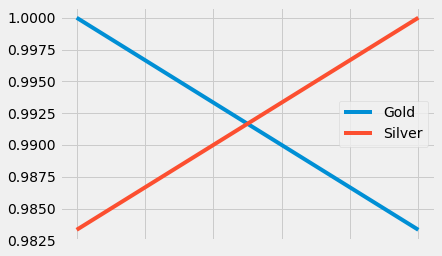

In [77]:
df3.plot()
plt.legend()
plt.show()

### Gold and Silver Re-Sampling By Year...

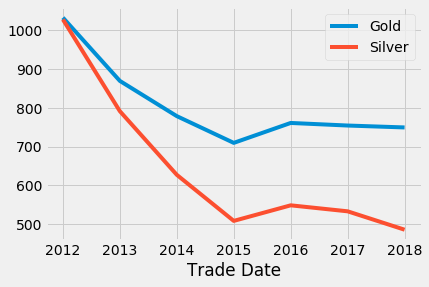

In [87]:
df = pd.read_pickle('GoldSilver.pickle')
df4 = df[['Gold','Silver']].resample('Y', convention = 'end').mean() # end of month
df4.plot()
plt.legend()
plt.show()

### Gold and Silver Re-Sampling By Month...

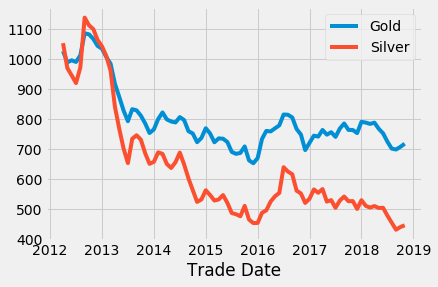

In [88]:
df = pd.read_pickle('GoldSilver.pickle')
df5 = df[['Gold','Silver']].resample('M', convention = 'end').mean() # end of month
df5.plot()
plt.legend()
plt.show()

### Gold and Silver Re-Sampling By Day...

In [ ]:
# This is not ideal, as there are so many values to plot.

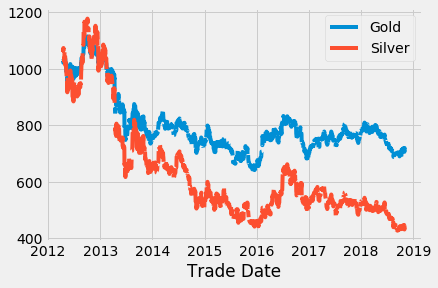

In [89]:
df = pd.read_pickle('GoldSilver.pickle')
df5 = df[['Gold','Silver']].resample('D').mean()
df5.plot()
plt.legend()
plt.show()